K-Means Clustering:
k = 2, SSE = 4545746.29
k = 3, SSE = 2633555.33
k = 4, SSE = 1341379.57
k = 5, SSE = 916379.19
k = 6, SSE = 684050.75
k = 7, SSE = 597022.73
k = 8, SSE = 547908.57


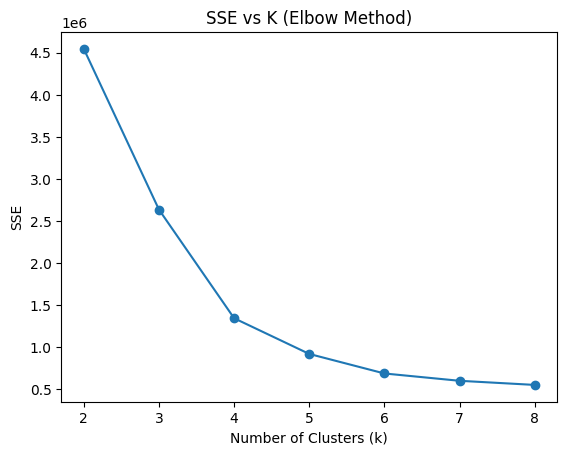


Hierarchical Clustering:


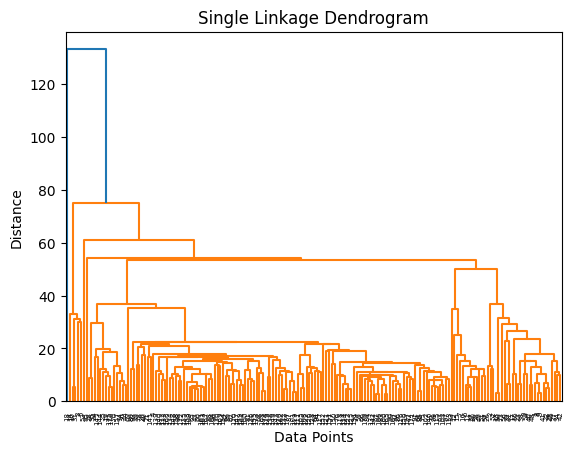

Silhouette Coefficient for Single-Link: 0.49


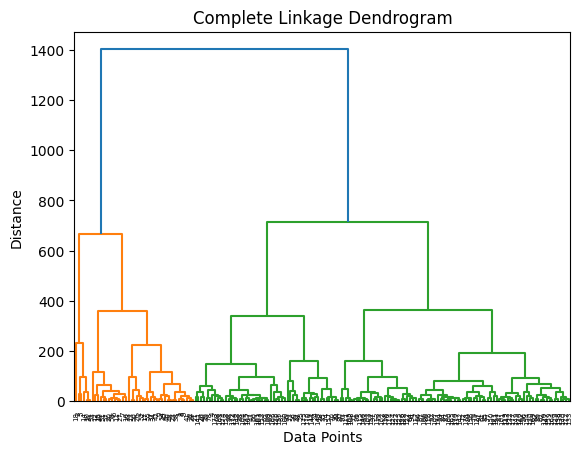

Silhouette Coefficient for Complete-Link: 0.54


In [1]:
import csv
import math
import random
import matplotlib.pyplot as plt

# Load the wine dataset
def load_dataset(file_path):
    data = []
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        for row in reader:
            data.append([float(x) for x in row[1:]])  # Skip the first column (class labels)
    return data

# Euclidean distance
def euclidean_distance(p1, p2):
    return math.sqrt(sum((p1[i] - p2[i]) ** 2 for i in range(len(p1))))

# K-Means Clustering
def k_means(data, k, max_iterations=100):
    centroids = random.sample(data, k)  # Randomly initialize centroids
    for _ in range(max_iterations):
        clusters = [[] for _ in range(k)]
        # Assign points to the nearest centroid
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_index = distances.index(min(distances))
            clusters[cluster_index].append(point)
        # Calculate new centroids
        new_centroids = []
        for cluster in clusters:
            if cluster:
                new_centroids.append([sum(dim) / len(cluster) for dim in zip(*cluster)])
            else:
                new_centroids.append(random.choice(data))  # Handle empty clusters
        # Check for convergence
        if new_centroids == centroids:
            break
        centroids = new_centroids
    # Calculate SSE
    sse = sum(
        sum(euclidean_distance(point, centroids[i]) ** 2 for point in clusters[i])
        for i in range(k)
    )
    return centroids, clusters, sse

# SSE vs K Plot
def plot_sse(data, max_k):
    sse_values = []
    for k in range(2, max_k + 1):
        _, _, sse = k_means(data, k)
        sse_values.append(sse)
        print(f"k = {k}, SSE = {sse:.2f}")
    plt.plot(range(2, max_k + 1), sse_values, marker='o')
    plt.title("SSE vs K (Elbow Method)")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("SSE")
    plt.show()

# Hierarchical Clustering
def hierarchical_clustering(data, method='single', k=3):
    def cluster_distance(c1, c2):
        if method == 'single':
            return min(euclidean_distance(p1, p2) for p1 in c1 for p2 in c2)
        elif method == 'complete':
            return max(euclidean_distance(p1, p2) for p1 in c1 for p2 in c2)

    clusters = [[point] for point in data]
    while len(clusters) > k:
        closest_pair = None
        min_distance = float('inf')
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = cluster_distance(clusters[i], clusters[j])
                if dist < min_distance:
                    min_distance = dist
                    closest_pair = (i, j)
        c1, c2 = closest_pair
        clusters[c1].extend(clusters[c2])
        del clusters[c2]
    return clusters

# Silhouette Coefficient
def silhouette_coefficient(data, clusters):
    def silhouette_score(point, own_cluster, other_clusters):
        a = sum(euclidean_distance(point, other) for other in own_cluster) / (len(own_cluster) - 1) if len(own_cluster) > 1 else 0
        b = min(
            sum(euclidean_distance(point, other) for other in cluster) / len(cluster)
            for cluster in other_clusters if len(cluster) > 0
        )
        return (b - a) / max(a, b) if max(a, b) != 0 else 0

    scores = []
    for i, cluster in enumerate(clusters):
        other_clusters = [clusters[j] for j in range(len(clusters)) if j != i]
        scores.extend(silhouette_score(point, cluster, other_clusters) for point in cluster)
    return sum(scores) / len(scores)

# Plot Dendrogram (Bar Chart Representation)
def plot_dendrogram(data, method='single'):
    from scipy.cluster.hierarchy import linkage, dendrogram
    linkage_matrix = linkage(data, method=method)
    dendrogram(linkage_matrix)
    plt.title(f"{method.capitalize()} Linkage Dendrogram")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()

# Main Execution
file_path = '/content/wine.csv'
data = load_dataset(file_path)

# K-Means Clustering
print("K-Means Clustering:")
plot_sse(data, max_k=8)

# Hierarchical Clustering with Silhouette Coefficients
print("\nHierarchical Clustering:")
single_clusters = hierarchical_clustering(data, method='single', k=3)
single_silhouette = silhouette_coefficient(data, single_clusters)
plot_dendrogram(data, method='single')
print(f"Silhouette Coefficient for Single-Link: {single_silhouette:.2f}")

complete_clusters = hierarchical_clustering(data, method='complete', k=3)
complete_silhouette = silhouette_coefficient(data, complete_clusters)
plot_dendrogram(data, method='complete')
print(f"Silhouette Coefficient for Complete-Link: {complete_silhouette:.2f}")
